The code for this was inspired from the following tutorial on youtube: 
https://youtu.be/VmbA0pi2cRQ 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
attendancedata = pd.read_csv("/content/AttendanceMarksSA.csv")

In [ ]:
attendancedata.head()

,Attendance,MSE,ESE
0,70,10,42
1,92,7,39
2,67,3,32
3,82,16,50
4,80,9,44


In [ ]:

#prediction= w1 * x + w2; #equation of a line # y= mx+c where m and c are variables. y is output and x is input

#mserror += 1/n* pow((y-prediction),2)
#we need to minimize the error so we take the partial derivative of error with respect to each of its variables

#pderrorbypdw1= -2/n*(y-prediction)*x where n is the length of input dataset or the number of inputs
#pderrorbypdw2= 2*(y-prediction)* (0-1)

def gradient_descent(iterations=1000,w1=0, w2=0, pderrorbypdw1=0, pderrorbypdw2=0, count=0):
  for i in range(iterations):
    count=0
    pderrorbypdw1=0
    pderrorbypdw2=0
    X=attendancedata['Attendance'][0:50]
    n=len(X)
    for x in X:
      x=x/100 #when not dividing sometimes the values of partial derivative increase exponentially
      y= attendancedata['MSE'][count]
      y=y/100
      pderrorbypdw1 += -(2/n) * ( y - ( w1 * x + w2 ) ) * x # partial derivative is abbreviated pd here
      pderrorbypdw2 += -(2/n) * (y- ( w1 * x + w2 ) )   
      count+=1
      #if(count%100==0):
      print('x=', x, 'y=', y, 'pderrorbypdw1=', pderrorbypdw1, 'pderrorbypdw2=', pderrorbypdw2, 'count=', count)
    
    alpha=0.01 # this is the learning rate or the size of the steps taken to minimize the mean squared error
    w1=w1-alpha*pderrorbypdw1
    w2=w2-alpha*pderrorbypdw2
  paramets=[w1,w2] #returns the final set of parameter values
  return paramets

In [ ]:
finalparams= gradient_descent()

Streaming output truncated to the last 5000 lines.
x= 0.7 y= 0.1 pderrorbypdw1= -0.0001847358419803191 pderrorbypdw2= -0.00026390834568617015 count= 1
x= 0.92 y= 0.07 pderrorbypdw1= 0.001021323202344063 pderrorbypdw2= 0.0010470253981446798 count= 2
x= 0.67 y= 0.03 pderrorbypdw1= 0.0026862576743739105 pderrorbypdw2= 0.0035320022220698254 count= 3
x= 0.82 y= 0.16 pderrorbypdw1= 0.0006695094745861369 pderrorbypdw2= 0.001072553197938394 count= 4
x= 0.8 y= 0.09 pderrorbypdw1= 0.0009146890124070264 pderrorbypdw2= 0.0013790276202145057 count= 5
x= 0.72 y= 0.11 pderrorbypdw1= 0.0004612101220995522 pderrorbypdw2= 0.0007491958281207916 count= 6
x= 0.85 y= 0.07 pderrorbypdw1= 0.001474126057418217 pderrorbypdw2= 0.0019408616343780443 count= 7
x= 0.75 y= 0.1 pderrorbypdw1= 0.001340088336139445 pderrorbypdw2= 0.001762144672673015 count= 8
x= 0.8 y= 0.08 pderrorbypdw1= 0.0019052678739603342 pderrorbypdw2= 0.0024686190949491267 count= 9
x= 0.7 y= 0.08 pderrorbypdw1= 0.002280532031980015 pderrorbypdw2=

In [ ]:
print(finalparams)

[0.04704254399867517, 0.0593306736977257]


In [ ]:
X=attendancedata['Attendance'][0:50]
def prediction_calc():
  predicted_vals=[]
  for x in X:
    prediction=(finalparams[0]*x+finalparams[1])
    predicted_vals.append(prediction)
  return predicted_vals

[3.3523087536049876, 4.387244721575841, 3.211181121608962, 3.9168192815890897, 3.822734193591739, 3.446393841602338, 4.0579469135851145, 3.5875214735983634, 3.822734193591739, 3.3523087536049876, 4.0579469135851145, 3.117096033611612, 3.3523087536049876, 3.5875214735983634, 3.822734193591739, 4.0579469135851145, 3.5875214735983634, 3.258223665607637, 3.117096033611612, 4.528372353571866, 4.29315963357849, 3.728649105594389, 3.728649105594389, 3.822734193591739, 4.0579469135851145, 4.528372353571866, 3.728649105594389, 3.775691649593064, 3.117096033611612, 4.669499985567892, 4.669499985567892, 3.258223665607637, 4.19907454558114, 3.5875214735983634, 4.19907454558114, 4.19907454558114, 4.19907454558114, 4.29315963357849, 3.5875214735983634, 4.669499985567892, 4.528372353571866, 4.669499985567892, 3.728649105594389, 4.528372353571866, 3.5875214735983634, 3.681606561595714, 4.0579469135851145, 3.3523087536049876, 4.528372353571866, 4.528372353571866]


[]

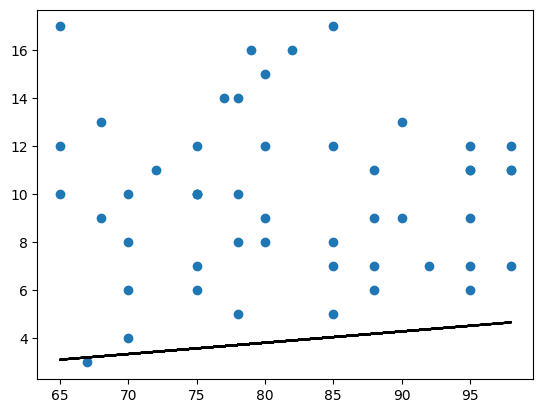

In [ ]:
X=attendancedata['Attendance'][0:50]
marks=attendancedata['MSE'][0:50]
plt.scatter(X,marks)
pred=prediction_calc()
print(pred)
plt.plot(X,pred, color='black')
plt.plot()